# NBA All-Star Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Source #1

In [2]:
df_2021 = pd.read_excel("C:/Users/14699/nba-allstar-prediction/2020-2021.xlsx", index_col=0)

Here we are exploring the dataset, looking at the available features and getting a sense of what data lies within the dataframe

In [3]:
df_2021.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Rk,,,,,,,,,,,,,,,,,,,,,
1,Stephen Curry,32,GSW,PG,63,63,34.2,10.4,21.7,0.482,...,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,"MVP-3,AS,NBA1"
2,Bradley Beal,27,WAS,SG,60,60,35.8,11.2,23.0,0.485,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,"AS,NBA3"
3,Damian Lillard,30,POR,PG,67,67,35.8,9.0,19.9,0.451,...,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,"MVP-7,AS,NBA2"
4,Joel Embiid,26,PHI,C,51,51,31.1,9.0,17.6,0.513,...,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,"MVP-2,DPOY-7,AS,NBA2"
5,Giannis Antetokounmpo,26,MIL,PF,61,61,33.0,10.3,18.0,0.569,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,"MVP-4,DPOY-5,AS,NBA1"


In [4]:
df_2021.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards'],
      dtype='object')

Here we are creating our target feature, All-Star selection. Since the original dataset had all awards listed within a single column, we can create a binary column for All-Star selection.

In [5]:
df_2021['AllStar'] = df_2021['Awards'].apply(lambda x: 1 if 'AS' in str(x) else 0)

Here we are verifying that the changes have been applied correctly.

In [6]:
df_2021.tail()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,AllStar
Rk,,,,,,,,,,,,,,,,,,,,,
381,Gabe Vincent,24,MIA,PG,50,7,13.1,1.8,4.7,0.378,...,0.9,1.1,1.3,0.4,0.0,0.7,1.6,4.8,NaN,0
382,Damian Jones,25,3TM,C,39,10,14.0,1.8,2.6,0.680,...,2.2,3.1,0.7,0.3,0.7,0.7,2.0,4.7,NaN,0
382,Damian Jones,25,PHO,C,14,0,6.7,0.6,1.1,0.500,...,0.8,1.3,0.3,0.1,0.4,0.4,1.4,1.6,NaN,0
382,Damian Jones,25,LAL,C,8,6,14.0,2.0,2.1,0.941,...,2.3,3.3,0.1,0.1,0.9,0.6,2.8,5.4,NaN,0
382,Damian Jones,25,SAC,C,17,4,20.1,2.7,4.1,0.657,...,3.3,4.5,1.4,0.5,1.0,0.9,2.1,6.9,NaN,0


In [7]:
df_2021.shape

(500, 31)

Here we are starting to clean the dataset by dropping unimportant features.

In [8]:
df_2021 = df_2021.drop(columns=['Age','ORB','DRB','FGA','3PA','2PA','FTA','Pos','PF'])

In [9]:
df_2021.columns

Index(['Player', 'Team', 'G', 'GS', 'MP', 'FG', 'FG%', '3P', '3P%', '2P',
       '2P%', 'eFG%', 'FT', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS',
       'Awards', 'AllStar'],
      dtype='object')

Now we have gotten rid of features that can't affect All-Star selection:

* age
* number of offensive and defensive rebounds (feature containing number of total rebounds remains in the dataset)
* number of attempted 3-point field goals, 2-point field goals, and free throws
* position
* number of fouls

In order to determine which features affect All-Star selection, we can create some visualizations.

In [10]:
df_2021 = df_2021.drop(columns='Awards')

In [11]:
corr_2021 = df_2021[['G', 'GS', 'MP', 'FG', 'FG%', '3P', '3P%', '2P','2P%', 'eFG%', 'FT', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS','AllStar']].corr()

<Axes: >

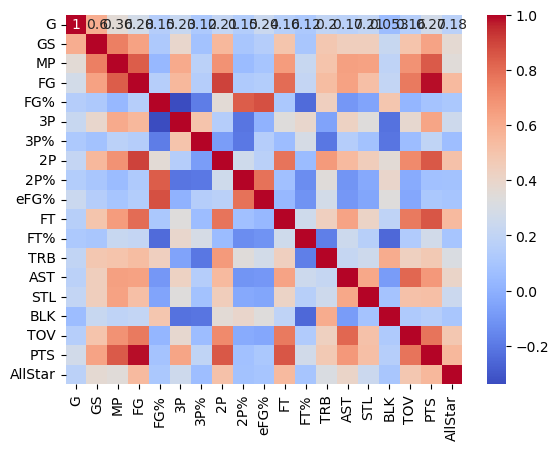

In [12]:
sns.heatmap(corr_2021, annot=True, cmap='coolwarm')

Based on the heatmap, we can see that All-Star selection is correlated with points, turnovers, assists, free throws, 2-point field goals, and total field goals. Given the context of how All-Star selections are truly made, these features are definitely going to be used to train the model.

Now we are going to use basketball context to determine whether there is any visual evidence for including some important player performance features, such as rebounds, blocks, 3-point field goals, efficient field goal percentage, and steals.

<Axes: xlabel='AllStar', ylabel='TRB'>

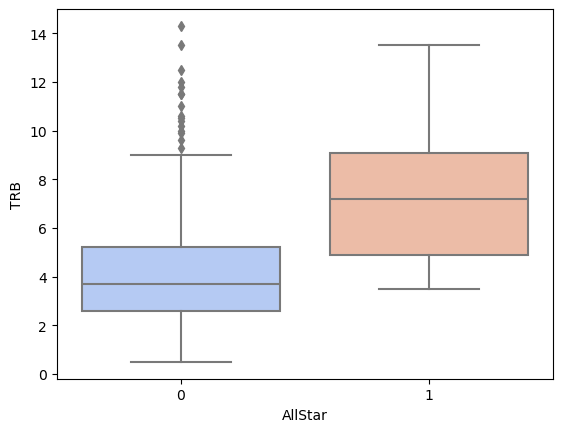

In [13]:
sns.boxplot(data=df_2021, x='AllStar', y='TRB', palette='coolwarm')

Here we can see that total rebounds could potentially have some impact on determining All-Star selection.

<Axes: xlabel='AllStar', ylabel='BLK'>

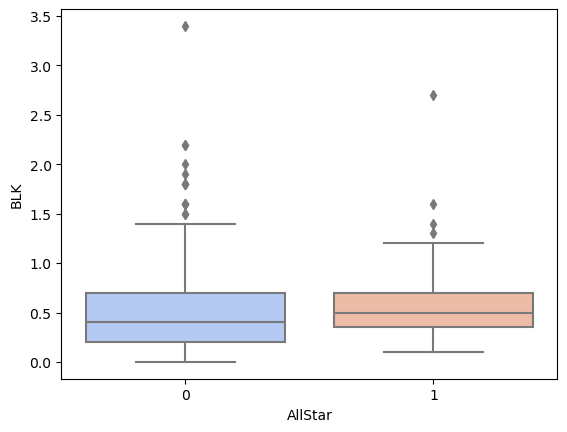

In [14]:
sns.boxplot(data=df_2021, x='AllStar', y='BLK', palette='coolwarm')

Here we can see that blocks are clearly not an important feature in determining All-Star selection.

<Axes: xlabel='AllStar', ylabel='3P'>

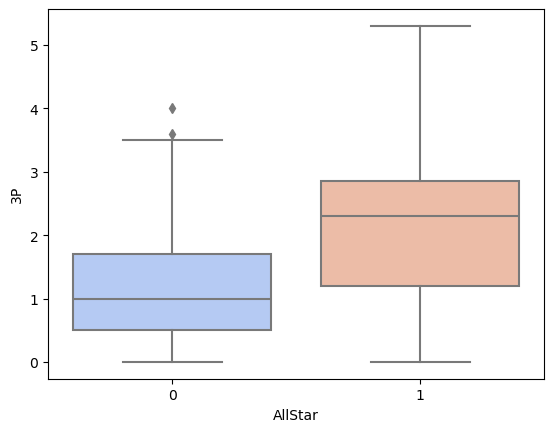

In [15]:
sns.boxplot(data=df_2021, x='AllStar', y='3P', palette='coolwarm')

<Axes: xlabel='AllStar', ylabel='eFG%'>

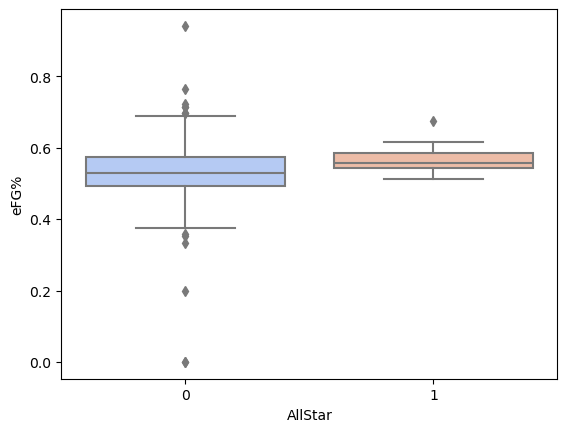

In [16]:
sns.boxplot(data=df_2021, x='AllStar', y='eFG%', palette='coolwarm')

Here we can see that neither 3-point field goals nor efficient field goal percentage are important features in determining All-Star selection.

<Axes: xlabel='AllStar', ylabel='STL'>

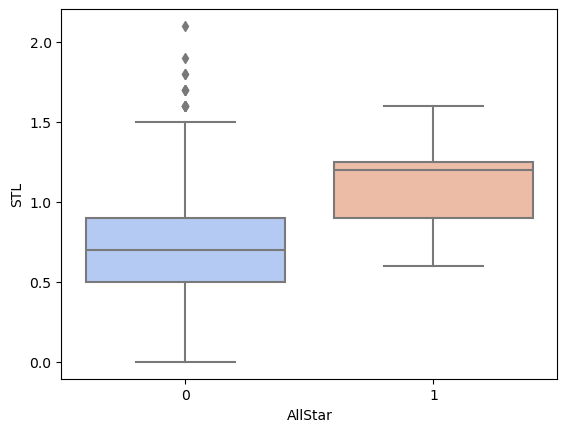

In [17]:
sns.boxplot(data=df_2021, x='AllStar', y='STL', palette='coolwarm')

Here we can see that steals might have some impact on determining All-Star selection.

Now we are separating our selected target features from the rest of the dataset.

In [18]:
target_features_2021 = df_2021[['Player','PTS','AST','TRB','STL','TOV','FT','2P','FG','AllStar']]

Now we are going to clean the target features up a little bit. There are multiple rows for many players due to them changing teams as a result of a trade. We must give each player only one row.

In [19]:
aggregated_features_2021 = target_features_2021.groupby('Player', as_index=False).agg({
    'PTS': 'mean',  # Average points per game
    'AST': 'mean',  # Average assists per game
    'TRB': 'mean',  # Average rebounds per game
    'STL': 'mean',  # Average steals per game
    'TOV': 'mean',  # Average turnovers per game
    'FT': 'sum',    # Sum of free throws made
    '2P': 'sum',    # Sum of two-point field goals made
    'FG': 'sum',    # Sum of field goals made
    'AllStar': 'max'  # Retain 1 if the player was an All-Star in any row
})

In [21]:
aggregated_features_2021.tail()

,Player,PTS,AST,TRB,STL,TOV,FT,2P,FG,AllStar
377,Willy Hernangómez,7.800000,1.100000,7.1,0.5,0.7,1.3,3.2,3.2,0
378,Xavier Tillman Sr.,6.600000,1.300000,4.3,0.7,0.8,0.6,2.5,2.8,0
379,Yogi Ferrell,6.566667,2.266667,2.3,0.9,0.6,1.6,4.4,7.5,0
380,Zach LaVine,27.400000,4.900000,5.0,0.8,3.5,4.4,6.4,9.8,1
381,Zion Williamson,27.000000,3.700000,7.2,0.9,2.7,6.0,10.2,10.4,1


Now we have aggregated player data for all 381 NBA players during the 2020-2021 season. We must repeat the same data wrangling steps for the 2021-2022 and 2022-2023 seasons.

### Data Source #2

In [22]:
df_2022 = pd.read_excel("C:/Users/14699/nba-allstar-prediction/2021-2022.xlsx", index_col=0)

In [23]:
df_2022.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Rk,,,,,,,,,,,,,,,,,,,,,
1,Joel Embiid,27,PHI,C,68,68,33.8,9.8,19.6,0.499,...,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,"MVP-2,AS,NBA2"
2,LeBron James,37,LAL,C,56,56,37.2,11.4,21.8,0.524,...,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,"MVP-10,AS,NBA3"
3,Giannis Antetokounmpo,27,MIL,PF,67,67,32.9,10.3,18.6,0.553,...,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,"MVP-3,DPOY-6,AS,NBA1"
4,Kevin Durant,33,BRK,PF,55,55,37.2,10.5,20.3,0.518,...,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,"MVP-10,AS,NBA2"
5,Luka Dončić,22,DAL,PG,65,65,35.4,9.9,21.6,0.457,...,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,"MVP-5,AS,NBA1"


In [24]:
df_2022['AllStar'] = df_2022['Awards'].apply(lambda x: 1 if 'AS' in str(x) else 0)

In [25]:
df_2022 = df_2022.drop(columns=['Age','ORB','DRB','FGA','3PA','2PA','FTA','Pos','PF','Awards'])

In [26]:
corr_2022 = df_2022[['G', 'GS', 'MP', 'FG', 'FG%', '3P', '3P%', '2P','2P%', 'eFG%', 'FT', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS','AllStar']].corr()

<Axes: >

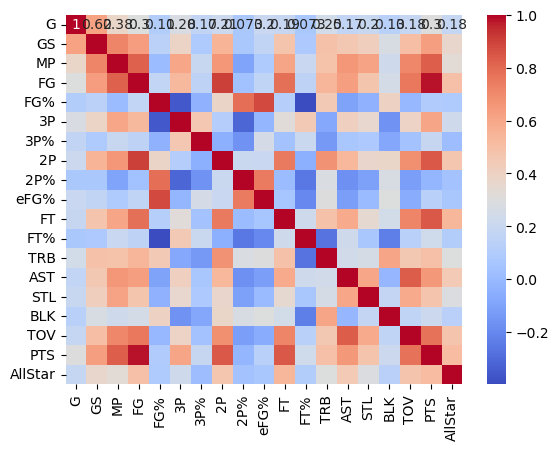

In [27]:
sns.heatmap(corr_2022, annot=True, cmap='coolwarm')

Here we can see that Assists have a higher correlation with All-Star selection compared to the previous year, so it is good we chose it as a feature earlier.

In [28]:
target_features_2022 = df_2022[['Player','PTS','AST','TRB','STL','TOV','FT','2P','FG','AllStar']]

In [29]:
aggregated_features_2022 = target_features_2022.groupby('Player', as_index=False).agg({
    'PTS': 'mean',  # Average points per game
    'AST': 'mean',  # Average assists per game
    'TRB': 'mean',  # Average rebounds per game
    'STL': 'mean',  # Average steals per game
    'TOV': 'mean',  # Average turnovers per game
    'FT': 'sum',    # Sum of free throws made
    '2P': 'sum',    # Sum of two-point field goals made
    'FG': 'sum',    # Sum of field goals made
    'AllStar': 'max'  # Retain 1 if the player was an All-Star in any row
})

In [30]:
aggregated_features_2022.tail()

,Player,PTS,AST,TRB,STL,TOV,FT,2P,FG,AllStar
379,Zach Collins,7.8,2.2,5.5,0.5,1.6,1.9,2.2,2.7,0
380,Zach LaVine,24.4,4.5,4.6,0.6,2.6,4.8,5.7,8.4,1
381,Zavier Simpson,11.0,7.5,5.3,1.3,2.5,1.3,4.5,4.8,0
382,Zeke Nnaji,6.6,0.4,3.6,0.4,0.6,1.0,1.4,2.3,0
383,Ziaire Williams,8.1,1.0,2.1,0.6,0.7,0.7,1.9,3.1,0


### Data Source #3

In [31]:
df_2023 = pd.read_excel("C:/Users/14699/nba-allstar-prediction/2022-2023.xlsx", index_col=0)

In [32]:
df_2023.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Rk,,,,,,,,,,,,,,,,,,,,,
1,Joel Embiid,28,PHI,C,66,66,34.6,11.0,20.1,0.548,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
2,Luka Dončić,23,DAL,PG,66,66,36.2,10.9,22.0,0.496,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
3,Damian Lillard,32,POR,PG,58,58,36.3,9.6,20.7,0.463,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
4,Shai Gilgeous-Alexander,24,OKC,PG,68,68,35.5,10.4,20.3,0.510,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
5,Giannis Antetokounmpo,28,MIL,PF,63,63,32.1,11.2,20.3,0.553,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"


In [33]:
df_2023['AllStar'] = df_2023['Awards'].apply(lambda x: 1 if 'AS' in str(x) else 0)

In [34]:
df_2023 = df_2023.drop(columns=['Age','ORB','DRB','FGA','3PA','2PA','FTA','Pos','PF','Awards'])

In [35]:
corr_2023 = df_2023[['G', 'GS', 'MP', 'FG', 'FG%', '3P', '3P%', '2P','2P%', 'eFG%', 'FT', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS','AllStar']].corr()

<Axes: >

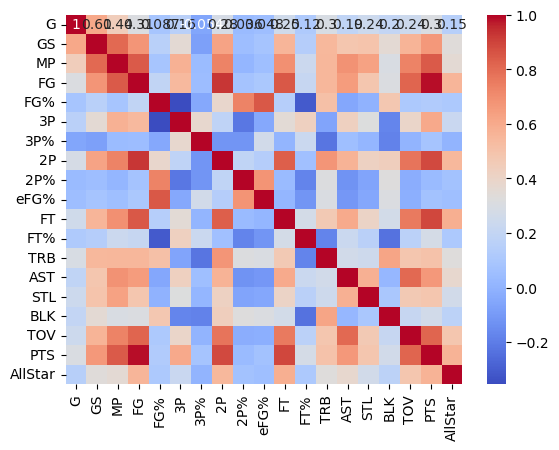

In [36]:
sns.heatmap(corr_2023, annot=True, cmap='coolwarm')

In [37]:
target_features_2023 = df_2023[['Player','PTS','AST','TRB','STL','TOV','FT','2P','FG','AllStar']]

In [38]:
aggregated_features_2023 = target_features_2023.groupby('Player', as_index=False).agg({
    'PTS': 'mean',  # Average points per game
    'AST': 'mean',  # Average assists per game
    'TRB': 'mean',  # Average rebounds per game
    'STL': 'mean',  # Average steals per game
    'TOV': 'mean',  # Average turnovers per game
    'FT': 'sum',    # Sum of free throws made
    '2P': 'sum',    # Sum of two-point field goals made
    'FG': 'sum',    # Sum of field goals made
    'AllStar': 'max'  # Retain 1 if the player was an All-Star in any row
})

In [39]:
aggregated_features_2023.tail()

,Player,PTS,AST,TRB,STL,TOV,FT,2P,FG,AllStar
389,Zach Collins,11.6,2.9,6.4,0.6,2.0,1.7,3.6,4.5,0
390,Zach LaVine,24.8,4.2,4.5,0.9,2.5,4.7,6.1,8.7,0
391,Zeke Nnaji,5.2,0.3,2.6,0.3,0.6,0.8,1.8,2.1,0
392,Ziaire Williams,5.7,0.9,2.1,0.4,1.0,0.5,1.6,2.3,0
393,Zion Williamson,26.0,4.6,7.0,1.1,3.4,6.1,9.6,9.8,1
